In [1]:
# Crie um modelo determinístico para algum sistema de seu interesse. 
# Defina claramente o problema que o sistema representa e o que se deseja medir com uma simulação. 
# Faça um estudo sobre as condições de entrada e saída do modelo e execute algumas simulações do sistema. 
# Apresente os resultados da simulação de duas formas diferentes.

In [1]:
from scipy.integrate import ode, solve_ivp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# SIR model

In [2]:
def sir_ode(times, init, parms):
    b, g = parms
    S,I,R = init
    # ODEs
    dS = -b*S*I
    dI = b*S*I-g*I
    dR = g*I
    return [dS,dI,dR]

In [3]:
parms = [0.1,0.05]
init = [0.99,0.01,0]
times = np.linspace(0,200,2001)

In [4]:
sir_sol = solve_ivp(fun=lambda t, y: sir_ode(t, y, parms), t_span=[min(times),max(times)], y0=init, t_eval=times)

In [5]:
sir_out = pd.DataFrame({"t":sir_sol["t"],"S":sir_sol["y"][0],"I":sir_sol["y"][1],"R":sir_sol["y"][2]})

In [6]:
plt.style.use("ggplot")

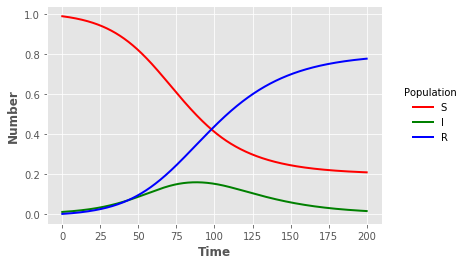

In [7]:
sline = plt.plot("t","S","",data=sir_out,color="red",linewidth=2)
iline = plt.plot("t","I","",data=sir_out,color="green",linewidth=2)
rline = plt.plot("t","R","",data=sir_out,color="blue",linewidth=2)
plt.xlabel("Time",fontweight="bold")
plt.ylabel("Number",fontweight="bold")
legend = plt.legend(title="Population",loc=5,bbox_to_anchor=(1.25,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)

In [8]:
# Scaling model

In [9]:
def micro_1(times,init,parms):
    beta, r, mu, K, alpha = parms
    S,I = init
    # ODEs
    dS = r*(1-S/K)*S - beta*S*I
    dI = beta*S*I-(mu + alpha)*I
    return [dS,dI]

In [10]:
w = 1
m = 10
beta = 0.0247*m*w**0.44
r = 0.6*w**-0.27
mu = 0.4*w**-0.26
K = 16.2*w**-0.7
alpha = (m-1)*mu

In [11]:
parms = [beta,r,mu,K,alpha]
init = [K,1.]
times = np.linspace(0,10,101)

In [12]:
sir_sol = solve_ivp(fun=lambda t, y: micro_1(t, y, parms), t_span=[min(times),max(times)], y0=init, t_eval=times)

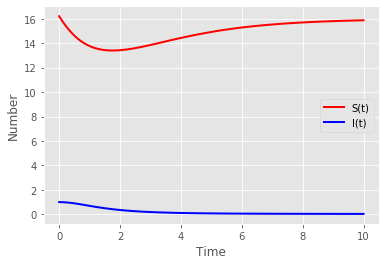

In [13]:
plt.plot(sir_sol.t,sir_sol.y[0],color="red",linewidth=2, label = "S(t)")
plt.plot(sir_sol.t,sir_sol.y[1],color="blue",linewidth=2, label = "I(t)")
plt.xlabel("Time")
plt.ylabel("Number")
plt.legend()

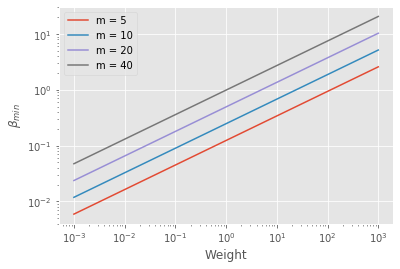

In [14]:
m = [5,10,20,40]
ws = 10**np.linspace(-3,3,601)
betas = np.zeros((601,4))
for i in range(4):
    betas[:,i] = 0.0247*m[i]*ws**0.44
plt.loglog(ws,betas)
plt.xlabel("Weight")
plt.ylabel(r'$\beta_{min}$')
plt.legend(("m = 5", "m = 10", "m = 20", "m = 40"))

In [15]:
# Linear System

In [16]:
m_list = [[4, 3], [-5, 9]]
A = np.array(m_list)

In [17]:
inv_A = np.linalg.inv(A)
print(inv_A)

[[ 0.17647059 -0.05882353]
 [ 0.09803922  0.07843137]]


In [18]:
B = np.array([20, 26])
X = np.linalg.inv(A).dot(B)
print(X)

[2. 4.]


In [19]:
# 4x + 3y + 2z = 25
# -2x + 2y + 3z = -10
# 3x -5y + 2z = -4

A = np.array([[4, 3, 2], [-2, 2, 3], [3, -5, 2]])
B = np.array([25, -10, -4])
X = np.linalg.inv(A).dot(B)
print(X)

[ 5.  3. -2.]


In [20]:
# 20x + 10y = 350
# 17x + 22y = 500

A = np.array([[20, 10], [17, 22]])
B = np.array([350, 500])
X = np.linalg.solve(A,B)
print(X)

[10. 15.]


In [21]:
A = np.array([[1,1,2],[-1,3,1],[0,5,2]])
print(A)

[[ 1  1  2]
 [-1  3  1]
 [ 0  5  2]]
